# 1. Predicting Pendulums

Can AI predict an oscillator?

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

np.random.seed(42)

In [2]:
sns.set(style='ticks', palette='Spectral', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)

plt.rcParams["figure.figsize"] = (20,8)

## The Data

For MLP just a few short cycles of a sine wave

In [3]:
L = 200  # length of samples to take
S = L/2  # number of training data sample to take

sim_x = np.array(list(range(L)))
sim_y = np.sin(0.1 * sim_x)

sample_indicies = np.random.choice(np.array(range(L)), int(S), replace=False)
sample = np.take(sim_y, sample_indicies)

In [4]:
X = sample_indicies
X = X.reshape(len(X), 1)
Y = sample

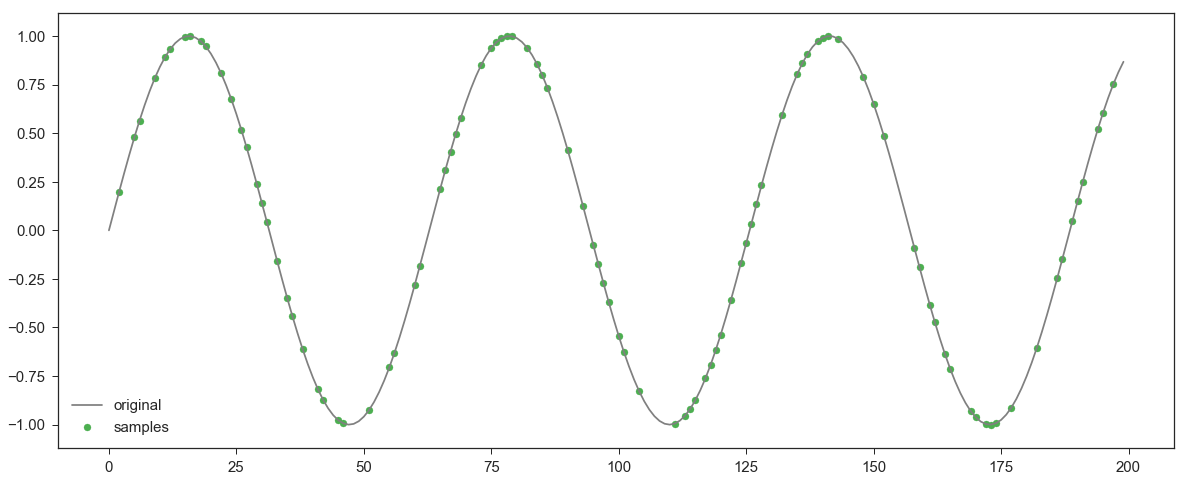

In [5]:
plt.plot(sim_y, c='gray', label='original')
plt.scatter(X, Y, label='samples')
plt.legend()
plt.show()

## 1. Build a simple MLP

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

### Grid Search Best Model

In [7]:
nnt = MLPRegressor(alpha=0.01, max_iter=3000)

# tried first
parameters = {
    'hidden_layer_sizes': [(100,), (10,10,10), (20,20,20), (10,10,10,10)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'adam'],
}

parameters = {
    'hidden_layer_sizes': [(100,), (5, 5), (10, 10, 10), (40, 40)],
    'activation' : [ 'logistic', 'tanh'],
    'solver' : ['lbfgs'],
}

clf = GridSearchCV(nnt, param_grid=parameters, return_train_score=True)

In [8]:
clf.fit(X, Y)

print ('-- grid search --')
print ('best params:', clf.best_params_)
nn = clf.best_estimator_
print ('best model:', nn)
print ('score on training data:', nn.score(X, Y))

-- grid search --
best params: {'activation': 'logistic', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}
best model: MLPRegressor(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
score on training data: 0.45685721585598116


### Use best model from grid search

In [9]:
nn = MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(10, 10, 10),
                  max_iter=10000, solver='lbfgs')
nn.fit(X, Y)

MLPRegressor(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

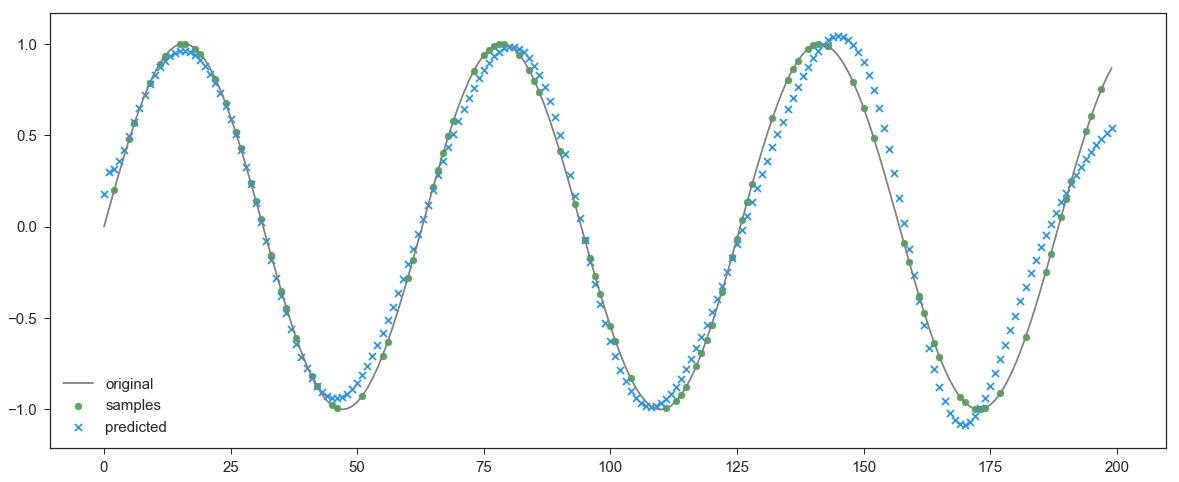

In [10]:
y = nn.predict(sim_x.reshape(L, 1))
plt.plot(sim_y, c='gray', label='original')
plt.scatter(X, Y, label='samples')
plt.scatter(sim_x, y, marker='x', label='predicted')
plt.legend()
plt.show()

## 2. LSTMs

...